In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.neighbors import NearestNeighbors

In [ ]:
# !pip install missingno

## Repository Dataset Cleaning

In [3]:
repos = pd.read_csv('../raw_data/repo_info_stop75.csv', index_col=0)

In [4]:
repos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24207 entries, 442942525 to 89774728
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               24207 non-null  object
 1   stargazers_count   24207 non-null  int64 
 2   forks_count        24207 non-null  int64 
 3   subscribers_count  24207 non-null  int64 
 4   topics             24207 non-null  object
 5   language           22148 non-null  object
 6   created_at         24207 non-null  object
 7   updated_at         24207 non-null  object
 8   url                24207 non-null  object
 9   search_word        24207 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.0+ MB


About 2000 repositories don't include a language. Because much of our analysis will be based on programming languages used, we will use listwise deletion.  

In [5]:
repos = repos.dropna()
repos.to_csv('../cleaned_data/repo_info_stop75.csv')
repos.info()
repos.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22148 entries, 442942525 to 89774728
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               22148 non-null  object
 1   stargazers_count   22148 non-null  int64 
 2   forks_count        22148 non-null  int64 
 3   subscribers_count  22148 non-null  int64 
 4   topics             22148 non-null  object
 5   language           22148 non-null  object
 6   created_at         22148 non-null  object
 7   updated_at         22148 non-null  object
 8   url                22148 non-null  object
 9   search_word        22148 non-null  object
dtypes: int64(3), object(7)
memory usage: 1.9+ MB


,stargazers_count,forks_count,subscribers_count
count,22148.000000,22148.000000,22148.000000
mean,1528.163220,386.822151,68.835787
std,5655.306246,1624.709025,220.778467
min,0.000000,0.000000,0.000000
25%,83.000000,38.000000,9.000000
50%,268.000000,95.000000,22.000000
75%,934.000000,263.000000,55.000000
max,189326.000000,86642.000000,7871.000000


We can see some stark outliers in our dataset, and we have to be careful not to put too much emphasis onto them. This can be mainly observed if we compare the median (50%) value to the mean we get for our numeric column values.


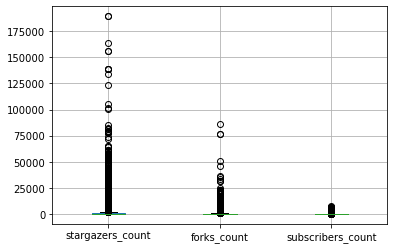

In [10]:
repos.boxplot()
plt.show()

The outliers can also been seen graphically in the above box plot.

## GitHub Users Cleaning

In [11]:
users = pd.read_csv('../raw_data/10_contributor_info_all.csv', index_col=0)

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45236 entries, dragonir to davidpeden3
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   login         45236 non-null  object
 1   url           45236 non-null  object
 2   type          45236 non-null  object
 3   name          39105 non-null  object
 4   company       21965 non-null  object
 5   location      29401 non-null  object
 6   hireable      8458 non-null   object
 7   bio           18108 non-null  object
 8   public_repos  45236 non-null  int64 
 9   public_gists  45236 non-null  int64 
 10  followers     45236 non-null  int64 
 11  following     45236 non-null  int64 
 12  created_at    45236 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


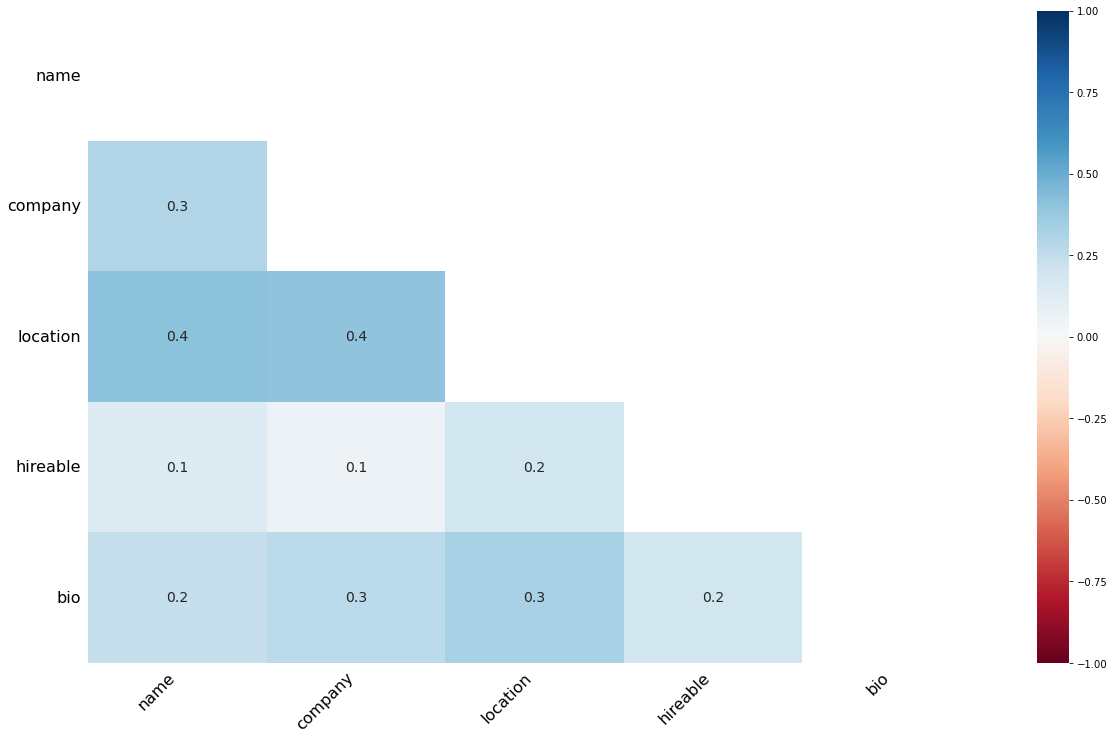

In [13]:
msno.heatmap(users)
plt.show()

We see no real nullity correlation between any two column variables (-1 would be totally negative correlated, +1 completely correlated)

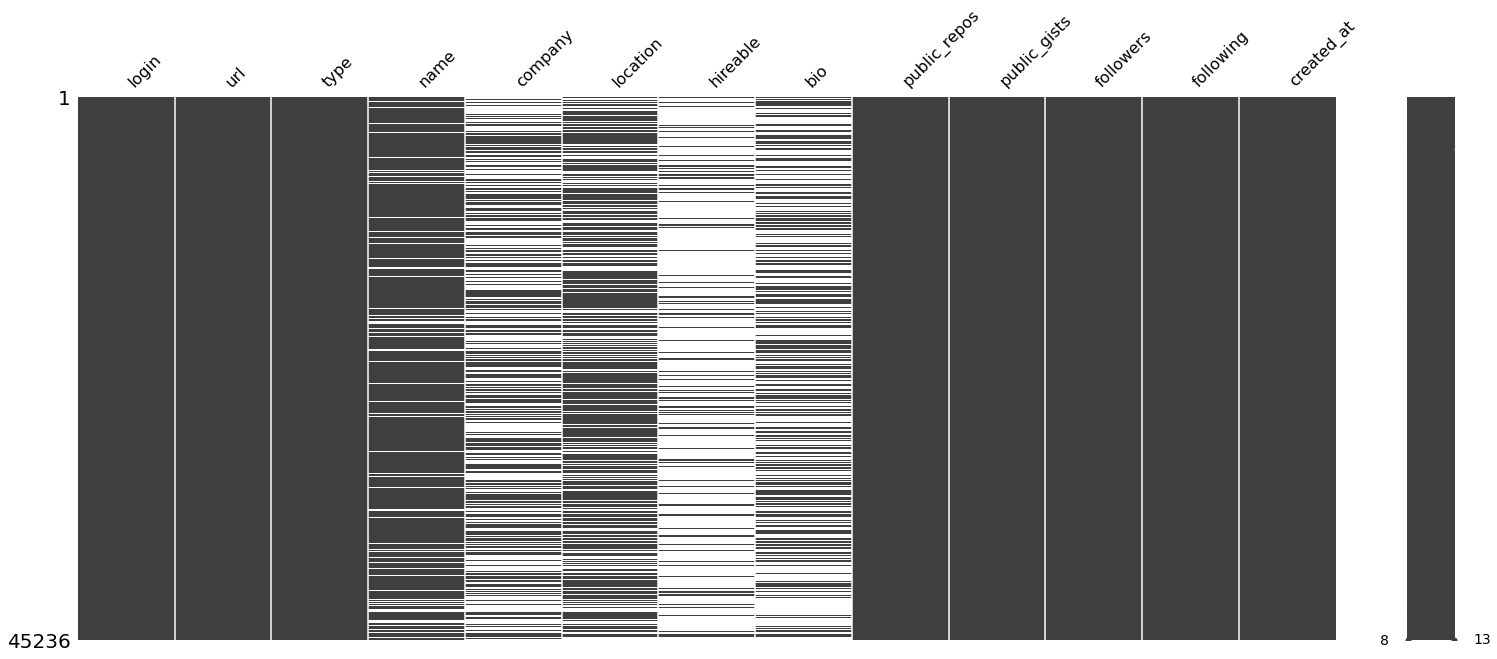

In [14]:
msno.matrix(users)
plt.show()

Using ResidentMario's missing data visualization module (https://github.com/ResidentMario/missingno), there is no nullity correlation to worry about in the heatmap as well as no pattern in the matrix visual. Therefore pairwise deletion will be used if a column with missing values is used in an analysis. 
Also `name`, `company`, `location`, `hireable` and `bio` are all user-set fields, therefore Missing Completely at Random and not due to data collection issues. 

In [15]:
users.describe()

,public_repos,public_gists,followers,following
count,45236.000000,45236.000000,45236.000000,45236.000000
mean,50.714254,14.801839,261.735786,32.267928
std,87.504336,147.734044,1705.232811,815.706893
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,8.000000,0.000000
50%,26.000000,1.000000,31.000000,4.000000
75%,60.000000,10.000000,117.000000,18.000000
max,3401.000000,25020.000000,156638.000000,159953.000000


Again, we see a stark difference between the median and mean, which we should keep in mind in further analysis.

Now we look for duplicate users. Users that have the same name, location and company (could have common names in common locations that would otherwise be counted as duplicates). There are 140 people that have more than 1 GitHub account.

In [16]:
name_counts = users.groupby(['location','name','company']).count()
duplicates = name_counts[name_counts.login>1].sort_values('login',ascending=False)
duplicates

,,,login,url,type,hireable,bio,public_repos,public_gists,followers,following,created_at
location,name,company,,,,,,,,,,
Amsterdam,Oleksii Trekhleb,Uber,4,4,4,4,4,4,4,4,4,4
"Needham, MA, USA",Allen Downey,Olin College of Engineering,4,4,4,4,4,4,4,4,4,4
"Los Angeles, CA",Mitchell Hashimoto,HashiCorp,3,3,3,0,0,3,3,3,3,3
"Washington, D.C.",Donne Martin,@facebook,3,3,3,3,3,3,3,3,3,3
"Little Rock, AR",Taylor Otwell,Laravel,3,3,3,0,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
Depends,George,@eurekahealth,2,2,2,0,2,2,2,2,2,2
"Denver, CO",Jean de Klerk,Google,2,2,2,0,2,2,2,2,2,2
Denmark,Christian Melchior,@realm,2,2,2,0,2,2,2,2,2,2
